In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
np.set_printoptions(precision=3)

In [3]:
import pandas as pd
from glob import glob
data = []
for f in sorted(glob("*data/*.xlsx")):
    # sorted is important!
    data.append(pd.read_excel(f, na_values=['Mod']))

In [4]:
len(data[0])

1249

In [5]:
# concat and give unique indices
train = pd.concat(data[:-1]).reset_index().drop("index", axis=1)
test = data[-1]

In [6]:
train.shape

(3701, 162)

In [7]:
test.shape

(1208, 162)

In [8]:
train.head()

,Model Year,Mfr Name,Division,Carline,Verify Mfr Cd,Index (Model Type Index),Eng Displ,# Cyl,Transmission,City FE (Guide) - Conventional Fuel,...,City CO2 Rounded Adjusted,Hwy CO2 Rounded Adjusted,Comb CO2 Rounded Adjusted (as shown on FE Label),CO2-PHEV Composite Rounded Adjusted Combined CO2,240V Charge Time at 240 volts (hours),120V Charge time at 120 Volts (hours),PHEV Total Driving Range (rounded to nearest 10 miles)DISTANCE,City PHEV Composite MPGe,Hwy PHEV Composite MPGe,Comb PHEV Composite MPGe
0,2015,FCA Italy,Alfa Romeo,4C,FTG,264,1.8,4,Auto(AM6),24,...,365,259,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,ASX,8,6.0,12,Auto(AM7),12,...,742,488,628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,ASX,4,4.7,8,Auto(AM7),14,...,655,426,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,ASX,1,4.7,8,Manual(M6),13,...,681,461,582,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,ASX,5,4.7,8,Auto(AM7),14,...,655,426,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train.columns

Index(['Model Year', 'Mfr Name', 'Division', 'Carline', 'Verify Mfr Cd',
       'Index (Model Type Index)', 'Eng Displ', '# Cyl', 'Transmission',
       'City FE (Guide) - Conventional Fuel',
       ...
       'City CO2 Rounded Adjusted', 'Hwy CO2 Rounded Adjusted',
       'Comb CO2 Rounded Adjusted (as shown on FE Label)',
       'CO2-PHEV Composite Rounded Adjusted Combined CO2',
       '240V Charge Time at 240 volts (hours)',
       '120V Charge time at 120 Volts (hours)',
       'PHEV Total Driving Range (rounded to nearest 10 miles)DISTANCE',
       'City PHEV Composite MPGe', 'Hwy PHEV Composite MPGe',
       'Comb PHEV Composite MPGe'],
      dtype='object', length=162)

In [10]:
train.dtypes

Model Year                                                                                    int64
Mfr Name                                                                                     object
Division                                                                                     object
Carline                                                                                      object
Verify Mfr Cd                                                                                object
Index (Model Type Index)                                                                      int64
Eng Displ                                                                                   float64
# Cyl                                                                                         int64
Transmission                                                                                 object
City FE (Guide) - Conventional Fuel                                                           int64


In [11]:
float_columns = train.columns[train.dtypes != "object"]
float_columns = float_columns[float_columns != 'Release Date']
len(float_columns)

93

In [12]:
# remove target
float_columns = np.array(float_columns)[float_columns != 'Comb Unrd Adj FE - Conventional Fuel']

In [13]:
# retain only columns that are not only missing
float_columns_nonzero = float_columns[train[float_columns].notnull().sum() > 0]

In [14]:
[f for f in float_columns_nonzero if "Fuel" in f]

['City FE (Guide) - Conventional Fuel',
 'Hwy FE (Guide) - Conventional Fuel',
 'Comb FE (Guide) - Conventional Fuel',
 'City Unadj FE - Conventional Fuel',
 'Hwy Unadj FE - Conventional Fuel',
 'Comb Unadj FE - Conventional Fuel',
 'City Unrd Adj FE - Conventional Fuel',
 'Hwy Unrd Adj FE - Conventional Fuel',
 'Annual Fuel1 Cost - Conventional Fuel',
 'EPA Calculated Annual Fuel Cost - Conventional Fuel -----  Annual fuel cost error. Please revise Verify. ',
 'City2 FE (Guide) - Alternative Fuel',
 'Hwy2 Fuel FE (Guide) - Alternative Fuel',
 'Comb2 Fuel FE (Guide) - Alternative Fuel',
 'City2 Unadj FE - Alternative Fuel',
 'Hwy2 Unadj FE - Alternative Fuel',
 'Comb2 Unadj FE - Alternative Fuel',
 'City2 Unrd Adj FE - Alternative Fuel',
 'Hwy2 Unrd Adj FE - Alternative Fuel',
 'Cmb2 Unrd Adj FE - Alternative Fuel',
 'Fuel2 Annual Fuel Cost - Alternative Fuel',
 'City CO2 Rounded Adjusted - Fuel2',
 'Hwy CO2 Rounded Adjusted - Fuel2',
 'Comb CO2 Rounded Adjusted - Fuel2',
 'Fuel2 EPA C

In [15]:
[f for f in float_columns_nonzero if "FE" in f]

['City FE (Guide) - Conventional Fuel',
 'Hwy FE (Guide) - Conventional Fuel',
 'Comb FE (Guide) - Conventional Fuel',
 'City Unadj FE - Conventional Fuel',
 'Hwy Unadj FE - Conventional Fuel',
 'Comb Unadj FE - Conventional Fuel',
 'City Unrd Adj FE - Conventional Fuel',
 'Hwy Unrd Adj FE - Conventional Fuel',
 'City2 FE (Guide) - Alternative Fuel',
 'Hwy2 Fuel FE (Guide) - Alternative Fuel',
 'Comb2 Fuel FE (Guide) - Alternative Fuel',
 'City2 Unadj FE - Alternative Fuel',
 'Hwy2 Unadj FE - Alternative Fuel',
 'Comb2 Unadj FE - Alternative Fuel',
 'City2 Unrd Adj FE - Alternative Fuel',
 'Hwy2 Unrd Adj FE - Alternative Fuel',
 'Cmb2 Unrd Adj FE - Alternative Fuel',
 'EPA FE Label Dataset ID',
 'FE Rating (1-10 rating on Label)',
 'Comb CO2 Rounded Adjusted (as shown on FE Label)']

In [16]:
not_fe = [f for f in float_columns_nonzero if "FE" not in f and "EPA" not in f and "CO2" not in f and "Guzzler" not in f]
not_fe

['Model Year',
 'Index (Model Type Index)',
 'Eng Displ',
 '# Cyl',
 '# Gears',
 'Max Ethanol % - Gasoline',
 'Max Biodiesel %',
 '2Dr Pass Vol',
 '2Dr Lugg Vol',
 '4Dr Pass Vol',
 '4Dr Lugg Vol',
 'Htchbk Pass Vol',
 'Htchbk Lugg Vol',
 'Annual Fuel1 Cost - Conventional Fuel',
 'Fuel2 Annual Fuel Cost - Alternative Fuel',
 'Intake Valves Per Cyl',
 'Exhaust Valves Per Cyl',
 'Carline Class',
 '# Batteries',
 'Total Voltage for Battery Pack(s)',
 'Batt Energy Capacity (Amp-hrs)',
 'Batt Specific Energy (Watt-hr/kg)',
 '# Capacitors',
 '# Drive Motor Gen',
 'GHG Rating (1-10 rating on Label)',
 '#1 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 1)',
 '#2 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 2)',
 '#3 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 3)',
 '$ You Save over 5 years (amount saved in fuel costs over 5 years - on label) ',
 '$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label) ']

In [17]:
target_train =train['Comb Unrd Adj FE - Conventional Fuel']
target_test =test['Comb Unrd Adj FE - Conventional Fuel']

In [18]:
len(not_fe)

30

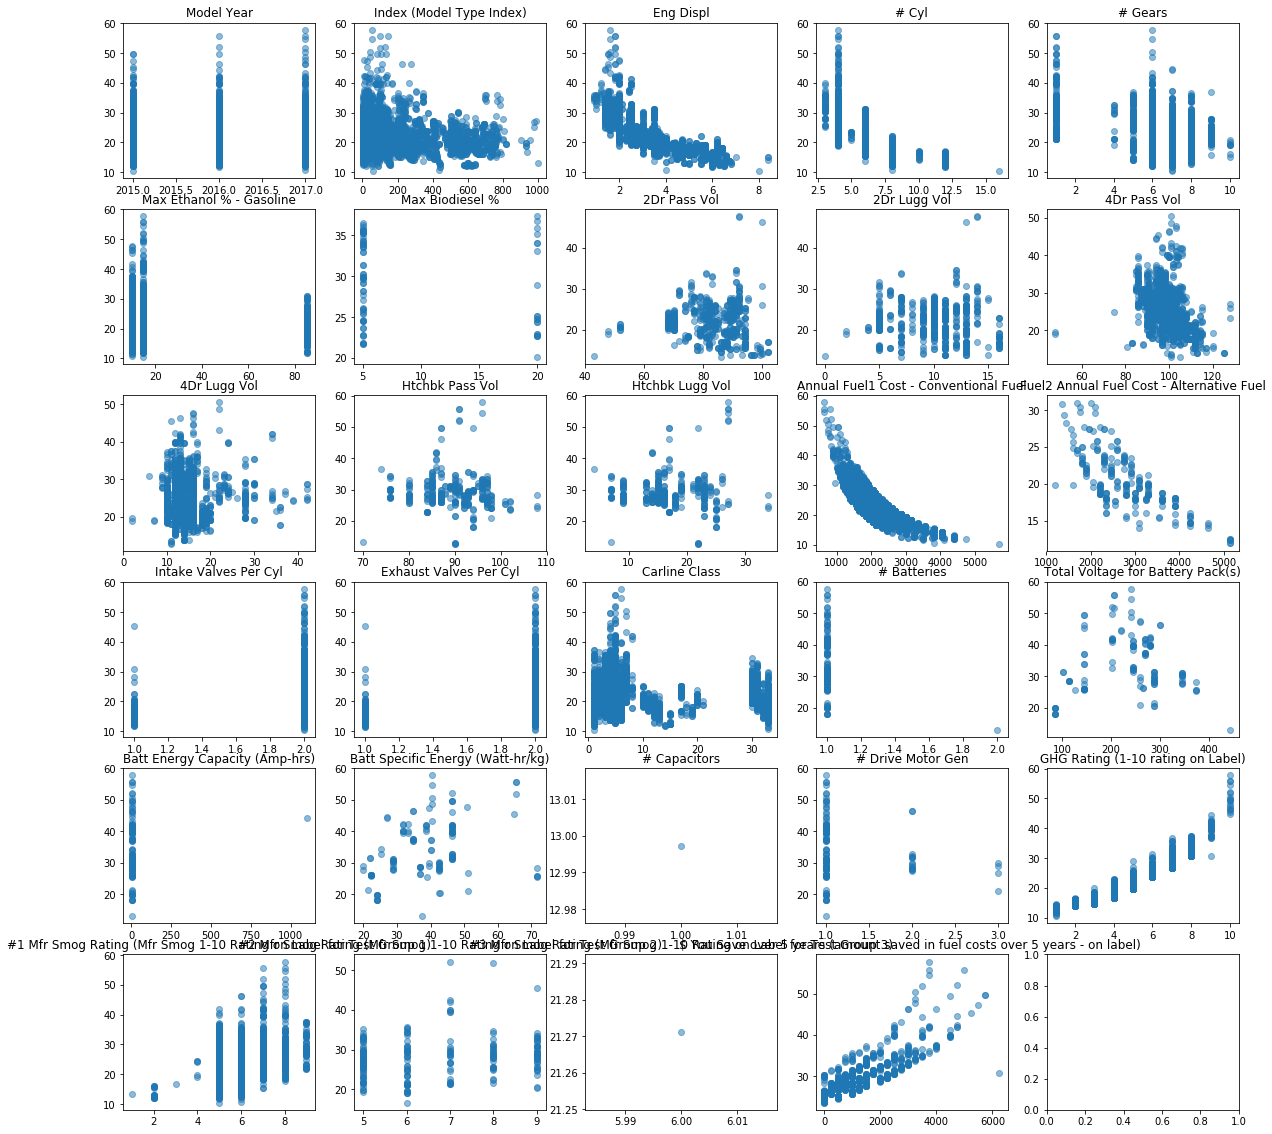

In [19]:
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 28:
        continue
    ax.scatter(train[not_fe].iloc[:, i], target_train, alpha=.5)
    ax.set_title(not_fe[i])

In [20]:
train['# Capacitors'].value_counts()

1.0    1
Name: # Capacitors, dtype: int64

In [21]:
print(train[train['# Capacitors'] == 1]['# Batteries'])
# this is the weird outlier
train[train['# Capacitors'] == 1]

2477    2.0
Name: # Batteries, dtype: float64


,Model Year,Mfr Name,Division,Carline,Verify Mfr Cd,Index (Model Type Index),Eng Displ,# Cyl,Transmission,City FE (Guide) - Conventional Fuel,...,City CO2 Rounded Adjusted,Hwy CO2 Rounded Adjusted,Comb CO2 Rounded Adjusted (as shown on FE Label),CO2-PHEV Composite Rounded Adjusted Combined CO2,240V Charge Time at 240 volts (hours),120V Charge time at 120 Volts (hours),PHEV Total Driving Range (rounded to nearest 10 miles)DISTANCE,City PHEV Composite MPGe,Hwy PHEV Composite MPGe,Comb PHEV Composite MPGe
2477,2017,Ferrari,"Ferrari North America, Inc.",LaFerrari Aperta,FEX,999,6.3,12,Auto(AM7),12,...,765,580,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
train['Batt Energy Capacity (Amp-hrs)'].idxmax()

1671

In [23]:
print(train.iloc[1671]['Batt Energy Capacity (Amp-hrs)'])
train[not_fe].iloc[1671]

1100.0


Model Year                                                                                  2016.0
Index (Model Type Index)                                                                      83.0
Eng Displ                                                                                      1.4
# Cyl                                                                                          4.0
# Gears                                                                                        7.0
Max Ethanol % - Gasoline                                                                      15.0
Max Biodiesel %                                                                                NaN
2Dr Pass Vol                                                                                   NaN
2Dr Lugg Vol                                                                                   NaN
4Dr Pass Vol                                                                                  94.0
4Dr Lugg V

In [24]:
train_sub = train.drop([1671, 2477])
target_train_sub = target_train.drop([1671, 2477])

In [25]:
good_features = []
for f in not_fe:
    if len(train_sub[f].value_counts()) < 2:
        print(f)
        continue
    second_most_common = train_sub[f].value_counts().iloc[1]
    if second_most_common < 2:
        print(f)
        continue
    good_features.append(f)

# Batteries
# Capacitors
#3 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 3)


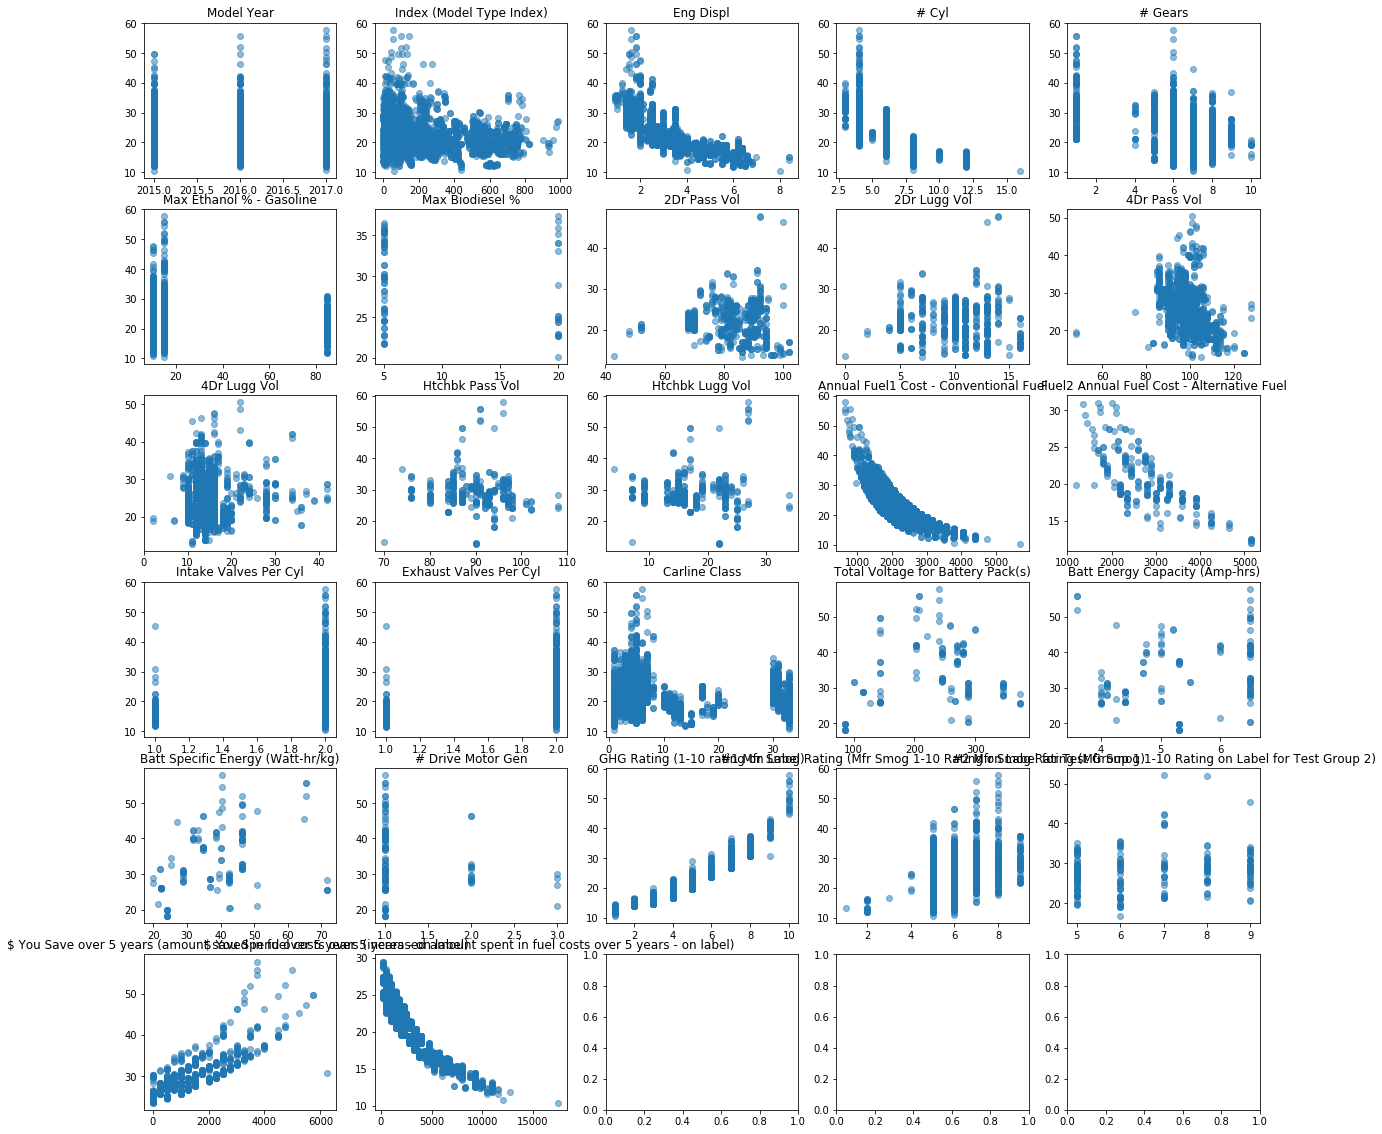

In [26]:
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 26:
        continue
    ax.scatter(train_sub[good_features].iloc[:, i], target_train_sub, alpha=.5)
    ax.set_title(good_features[i])

In [27]:
from sklearn.feature_selection import f_regression

In [28]:
import fancyimpute

Using TensorFlow backend.


In [29]:
knn_impute = fancyimpute.KNN()

In [30]:
mean = train_sub[good_features].mean()
std = train_sub[good_features].std()

In [31]:
mean

Model Year                                                                                  2015.998378
Index (Model Type Index)                                                                     208.641795
Eng Displ                                                                                      3.174047
# Cyl                                                                                          5.646661
# Gears                                                                                        6.508245
Max Ethanol % - Gasoline                                                                      16.119094
Max Biodiesel %                                                                                8.797468
2Dr Pass Vol                                                                                  82.650767
2Dr Lugg Vol                                                                                   9.586031
4Dr Pass Vol                                                    

In [32]:
scaled = (train_sub[good_features] - mean) / std

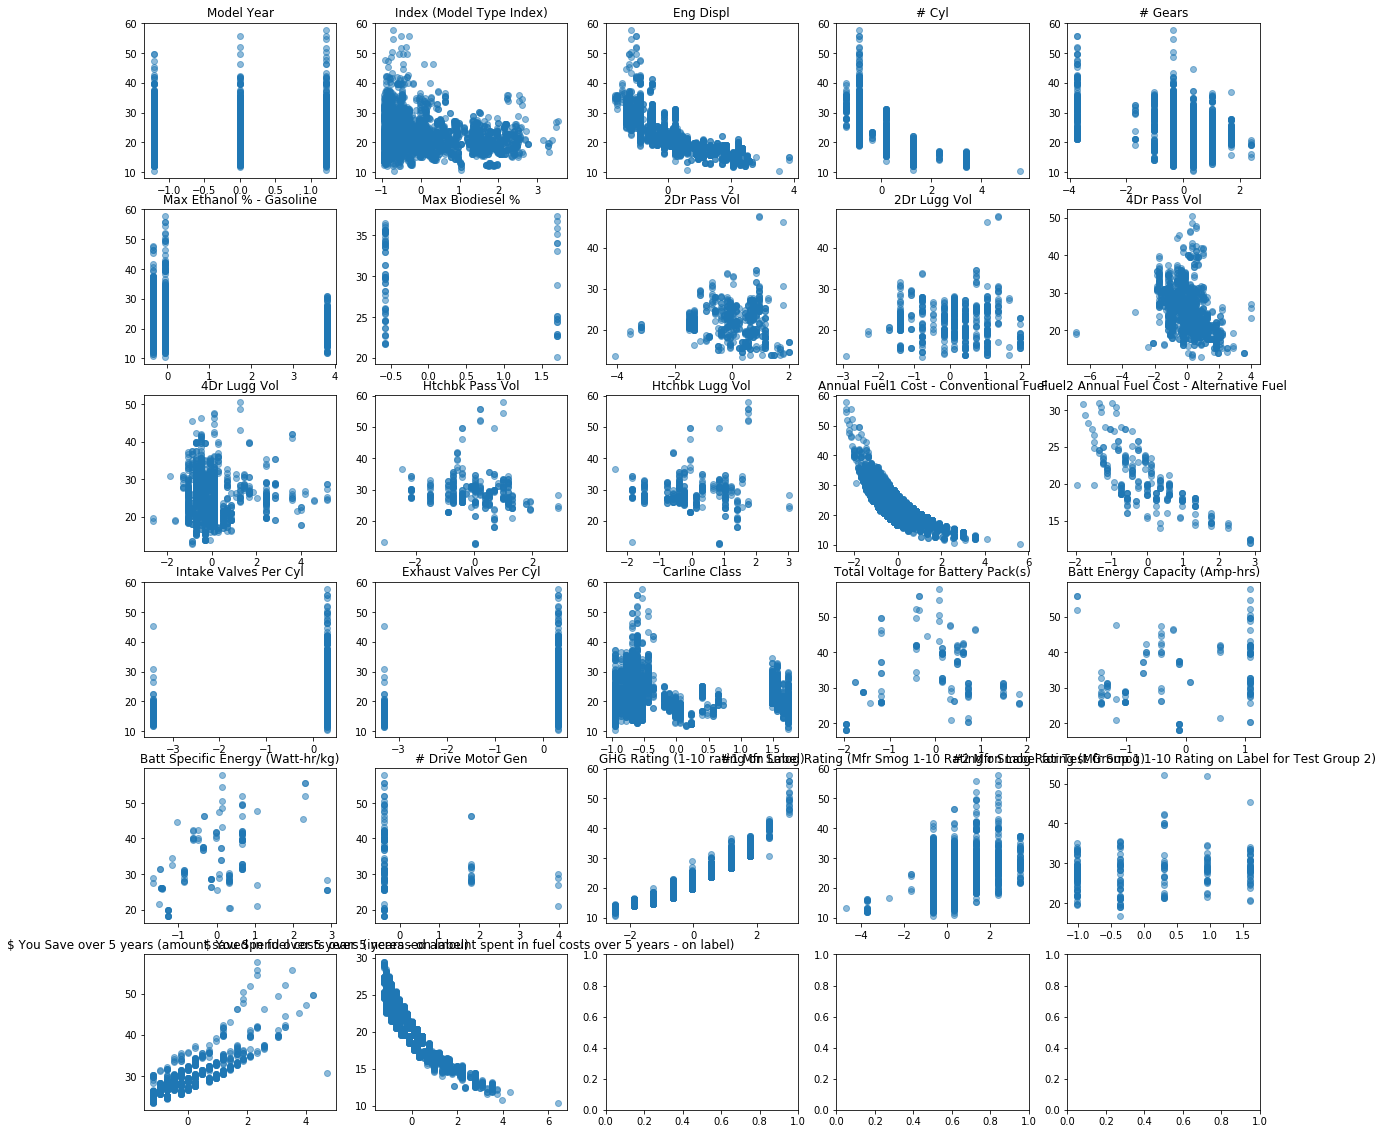

In [33]:
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 26:
        continue
    ax.scatter(scaled[good_features].iloc[:, i], target_train_sub, alpha=.5)
    ax.set_title(good_features[i])

In [34]:
train_impute = knn_impute.complete(scaled[good_features])

Imputing row 1/3699 with 14 missing, elapsed time: 3.129
Imputing row 101/3699 with 12 missing, elapsed time: 3.158
Imputing row 201/3699 with 10 missing, elapsed time: 3.182
Imputing row 301/3699 with 12 missing, elapsed time: 3.204
Imputing row 401/3699 with 12 missing, elapsed time: 3.224
Imputing row 501/3699 with 12 missing, elapsed time: 3.245
Imputing row 601/3699 with 12 missing, elapsed time: 3.266
Imputing row 701/3699 with 12 missing, elapsed time: 3.286
Imputing row 801/3699 with 14 missing, elapsed time: 3.308
Imputing row 901/3699 with 14 missing, elapsed time: 3.337
Imputing row 1001/3699 with 11 missing, elapsed time: 3.384
Imputing row 1101/3699 with 14 missing, elapsed time: 3.425
Imputing row 1201/3699 with 14 missing, elapsed time: 3.469
Imputing row 1301/3699 with 14 missing, elapsed time: 3.505
Imputing row 1401/3699 with 12 missing, elapsed time: 3.536
Imputing row 1501/3699 with 11 missing, elapsed time: 3.565
Imputing row 1601/3699 with 12 missing, elapsed time

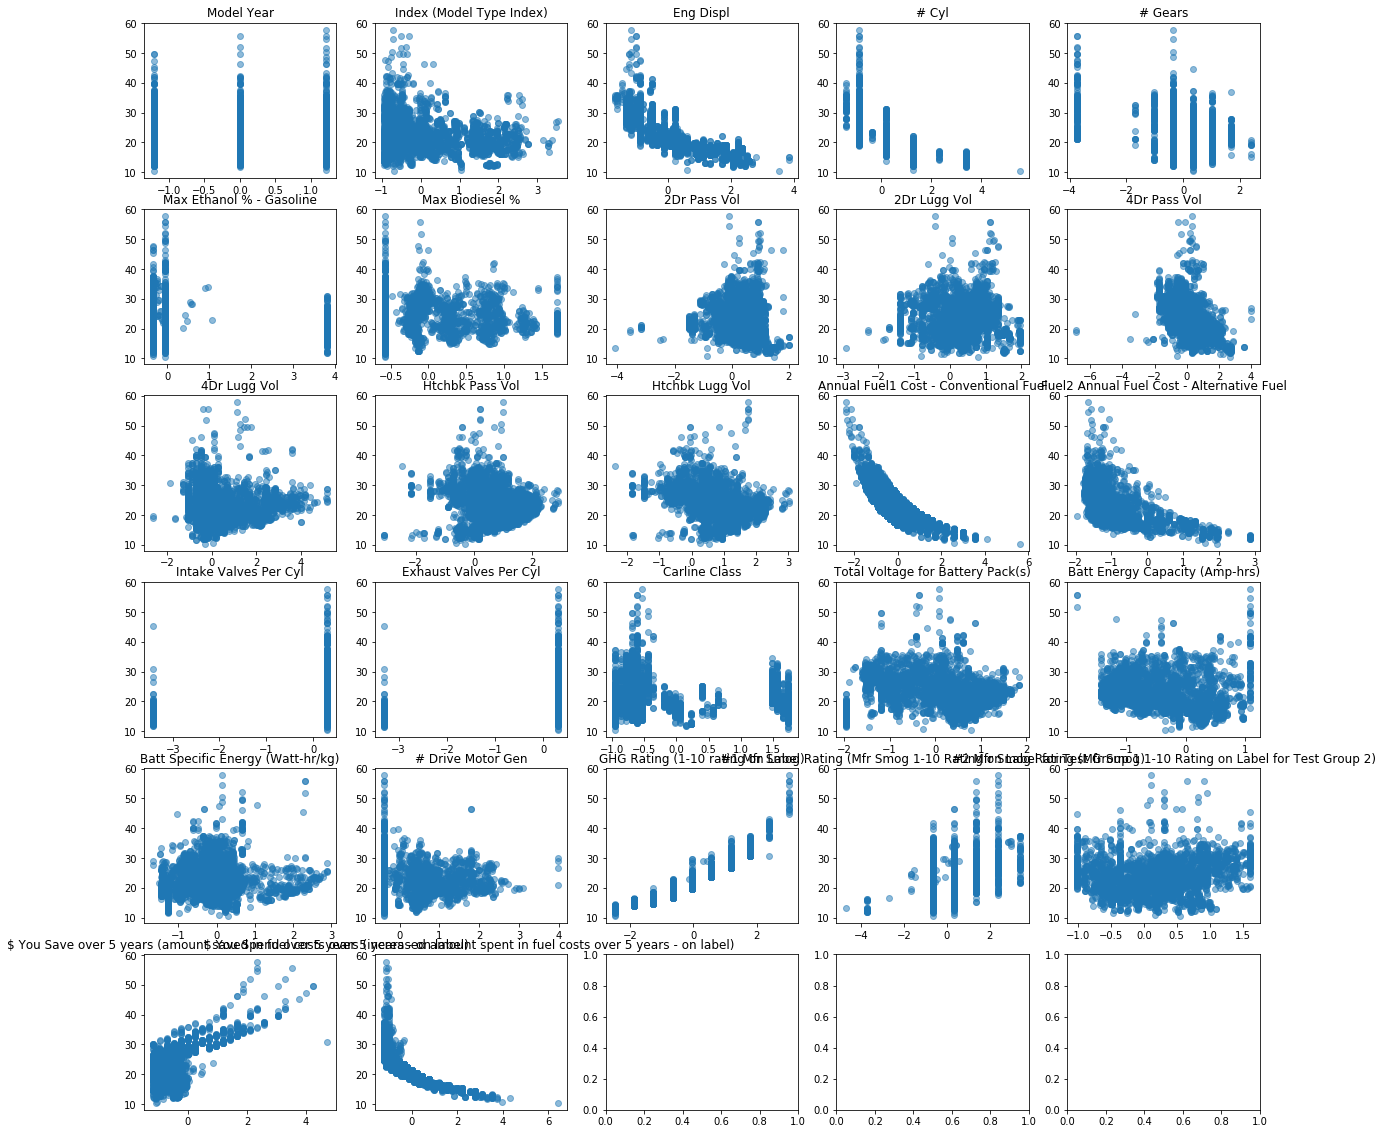

In [35]:
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 26:
        continue
    ax.scatter(train_impute[:, i], target_train_sub, alpha=.5)
    ax.set_title(good_features[i])

In [36]:
imputation_features_all = scaled[good_features].isnull()

In [37]:
imputation_features = imputation_features_all.loc[:, imputation_features_all.std() > 0]

In [38]:
f, p = f_regression(train_impute, target_train_sub)

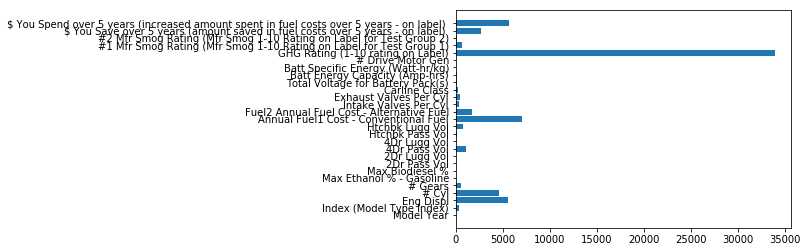

In [39]:
plt.barh(range(len(f)), f)
plt.yticks(range(len(f)), good_features);

In [40]:
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), train_impute, target_train_sub, cv=10)
print(scores)
print(scores.mean())

[ 0.939  0.962  0.948  0.968  0.961  0.956  0.963  0.96   0.924  0.924]
0.950609471975


In [41]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=0, shuffle=True)

scores = cross_val_score(LinearRegression(), train_impute, target_train_sub, cv=cv)
print(scores)
print(scores.mean())

[ 0.957  0.967  0.967  0.95   0.967  0.954  0.961  0.948  0.965  0.957]
0.959340797244


In [42]:
scores = cross_val_score(RidgeCV(), train_impute, target_train_sub, cv=10)
print(scores)
print(scores.mean())

[ 0.939  0.962  0.948  0.968  0.961  0.956  0.963  0.96   0.924  0.924]
0.950611506883


In [43]:
ridge = RidgeCV().fit(train_impute, target_train_sub)
lr = LinearRegression().fit(train_impute, target_train_sub)

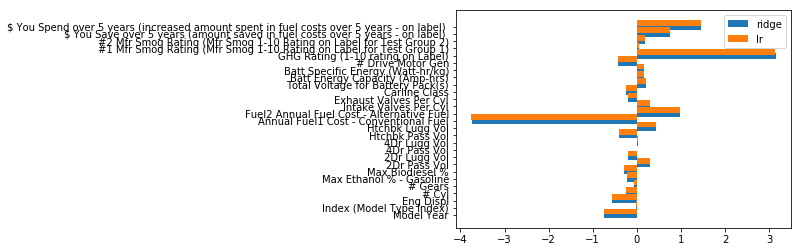

In [44]:
plt.barh(np.arange(train_impute.shape[1]), ridge.coef_, label="ridge")
plt.barh(np.arange(train_impute.shape[1]) + .5, lr.coef_, label="lr")
plt.legend()
plt.yticks(np.arange(train_impute.shape[1]), good_features);

In [45]:
train_impute_indicator = np.hstack([train_impute, imputation_features])

In [46]:
train_impute_indicator.shape

(3699, 45)

In [47]:
scores = cross_val_score(LinearRegression(), train_impute_indicator, target_train_sub, cv=10)
print(scores)
print(scores.mean())

[ 0.944  0.968  0.956  0.967  0.975  0.962  0.963  0.969  0.938  0.939]
0.958107311732


In [48]:
scores = cross_val_score(RidgeCV(), train_impute_indicator, target_train_sub, cv=10)
print(scores)
print(scores.mean())

[ 0.944  0.969  0.957  0.967  0.975  0.962  0.963  0.969  0.938  0.939]
0.958130800274


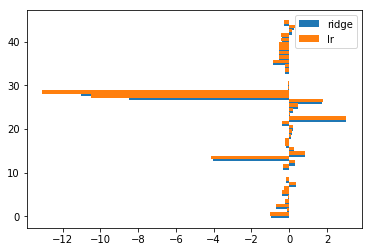

In [49]:
ridge = RidgeCV().fit(train_impute_indicator, target_train_sub)
lr = LinearRegression().fit(train_impute_indicator, target_train_sub)

plt.barh(np.arange(train_impute_indicator.shape[1]), ridge.coef_, label="ridge")
plt.barh(np.arange(train_impute_indicator.shape[1]) + .5, lr.coef_, label="lr")
plt.legend()

In [50]:
from sklearn.model_selection import cross_val_predict
y_pred_cv = cross_val_predict(LinearRegression(), train_impute_indicator, target_train_sub)

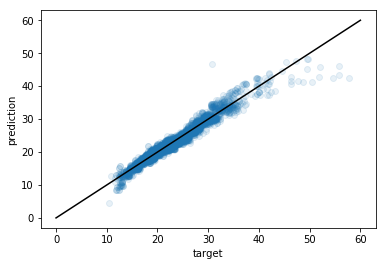

In [51]:
plt.scatter(target_train_sub, y_pred_cv, alpha=.1)
plt.xlabel("target")
plt.ylabel("prediction")
plt.plot([0, 60], [0, 60], c='k')

# Categorical features

In [52]:
cat_columns = train.columns[train.dtypes == "object"]
cat_columns

Index(['Mfr Name', 'Division', 'Carline', 'Verify Mfr Cd', 'Transmission',
       'Guzzler? ', 'Air Aspir Method', 'Air Aspiration Method Desc', 'Trans',
       'Trans Desc', 'Trans, Other', 'Lockup Torque Converter',
       'Trans Creeper Gear', 'Drive Sys', 'Drive Desc',
       'Range1 - Model Type Driving Range - Conventional Fuel',
       'Fuel Usage  - Conventional Fuel',
       'Fuel Usage Desc - Conventional Fuel', 'Fuel Unit - Conventional Fuel',
       'Fuel Unit Desc - Conventional Fuel',
       'Gas Guzzler Exempt (Where Truck = 1975 NHTSA truck definition)',
       'Gas Guzzler Exempt Desc (Where Truck = 1975 NHTSA truck definition)',
       ' Range2 - Alt Fuel Model Typ Driving Range - Alternative Fuel',
       ' Fuel2 Usage - Alternative Fuel',
       ' Fuel2 Usage Desc - Alternative Fuel', 'Fuel2 Unit - Alternative Fuel',
       'Fuel2 Unit Desc - Alternative Fuel',
       'Descriptor - Model Type (40 Char or less)', 'Carline Class Desc',
       'Car/Truck Category - Cas

In [53]:
cat_not_fe = [f for f in cat_columns if "FE" not in f and "EPA" not in f and "CO2" not in f and "Guzzler" not in f]

In [54]:
value_counts = train_sub[cat_not_fe].apply(lambda x: len(pd.value_counts(x)))

In [55]:
cat_nonconst = value_counts.index[value_counts > 1]

In [56]:
train_sub[cat_nonconst].notnull().mean()

Mfr Name                                                         1.000000
Division                                                         1.000000
Carline                                                          1.000000
Verify Mfr Cd                                                    1.000000
Transmission                                                     1.000000
Air Aspir Method                                                 0.466883
Air Aspiration Method Desc                                       1.000000
Trans                                                            1.000000
Trans Desc                                                       1.000000
Lockup Torque Converter                                          1.000000
Trans Creeper Gear                                               1.000000
Drive Sys                                                        1.000000
Drive Desc                                                       1.000000
Range1 - Model Type Driving Range - Co

In [57]:
cat_nonconst2 = cat_nonconst[train_sub[cat_nonconst].notnull().mean() > .1]

In [58]:
len(cat_nonconst2)

36

In [59]:
second_common = train_sub[cat_nonconst2].apply(lambda x: pd.value_counts(x).iloc[1])

In [60]:
second_common.sort_values()

Trans Creeper Gear                                              4
Label Recalc?                                                  17
Carline                                                        20
Comments - Mfr Eng Cnfg                                        24
#1 Smog Rating Test Group                                      36
Model Type Desc (MFR entered)                                  49
Car/Truck Category - Cash for Clunkers Bill.                   72
Cyl Deact Desc                                                 76
Descriptor - Model Type (40 Char or less)                     115
Var Valve Timing?                                             120
Air Aspir Method                                              162
Var Valve Lift Desc                                           169
Camless Valvetrain (Y or N)                                   208
Var Valve Timing Desc                                         209
Division                                                      259
Cyl Deact?

In [61]:
train_sub['Trans Creeper Gear'].value_counts()

N    3695
Y       4
Name: Trans Creeper Gear, dtype: int64

In [62]:
train_sub['Label Recalc?'].value_counts()

N    3490
Y      17
Name: Label Recalc?, dtype: int64

In [63]:
value_counts2 = train_sub[cat_nonconst2].apply(lambda x: len(pd.value_counts(x)))

In [64]:
value_counts2

Mfr Name                                                       28
Division                                                       49
Carline                                                      1152
Verify Mfr Cd                                                  28
Transmission                                                   28
Air Aspir Method                                                3
Air Aspiration Method Desc                                      4
Trans                                                           7
Trans Desc                                                      7
Lockup Torque Converter                                         2
Trans Creeper Gear                                              2
Drive Sys                                                       6
Drive Desc                                                      5
Fuel Usage  - Conventional Fuel                                 6
Fuel Usage Desc - Conventional Fuel                             6
Descriptor

In [65]:
cat_good = value_counts2.index[value_counts2 < 30]

In [66]:
len(cat_good)

28

In [162]:
train_sub_dummies = pd.get_dummies(train_sub[cat_good])
print(train_sub_dummies.shape)
train_sub_dummies = train_sub_dummies.T.drop_duplicates().T
print(train_sub_dummies.shape)

(3699, 236)
(3699, 179)


In [68]:
scores = cross_val_score(LinearRegression(), train_sub_dummies, target_train_sub, cv=10)
print(scores)
print(scores.mean())

[ -5.296e+23  -2.009e+21  -1.724e+23  -1.615e+22  -1.080e+22  -8.643e+21
  -1.576e+23  -8.655e+21   7.575e-01  -4.071e+23]
-1.3128933402e+23


In [69]:
scores = cross_val_score(LinearRegression(), train_sub_dummies, target_train_sub, cv=cv)
print(scores)
print(scores.mean())

[ -4.022e+21  -6.642e+22   7.844e-01  -4.058e+20  -4.057e+21  -4.378e+23
  -3.872e+20  -7.674e+21  -1.344e+23  -2.542e+22]
-6.80644247278e+22


In [70]:
scores = cross_val_score(RidgeCV(), train_sub_dummies, target_train_sub, cv=10)
print(scores)
print(scores.mean())

[ 0.701  0.75   0.719  0.678  0.708  0.809  0.647  0.703  0.759  0.58 ]
0.705454896648


In [71]:
scores = cross_val_score(RidgeCV(), train_sub_dummies, target_train_sub, cv=cv)
print(scores)
print(scores.mean())

[ 0.761  0.718  0.786  0.775  0.785  0.756  0.764  0.746  0.768  0.787]
0.7645961398


In [72]:
train_full = np.hstack([train_impute_indicator, train_sub_dummies])
scores = cross_val_score(RidgeCV(), train_full, target_train_sub, cv=cv)
print(scores)
print(scores.mean())

[ 0.965  0.976  0.979  0.969  0.98   0.963  0.974  0.969  0.978  0.972]
0.972470021408


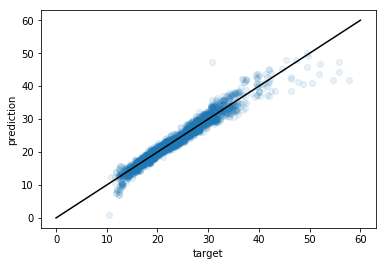

In [73]:
y_pred_cv = cross_val_predict(RidgeCV(), train_full, target_train_sub)

plt.scatter(target_train_sub, y_pred_cv, alpha=.1)
plt.xlabel("target")
plt.ylabel("prediction")
plt.plot([0, 60], [0, 60], c='k')

# Feature Engineering

In [74]:
train_nonzero = train_impute - train_impute.min(axis=0) + 1e-5

In [75]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_boxcox = pt.fit_transform(train_nonzero)

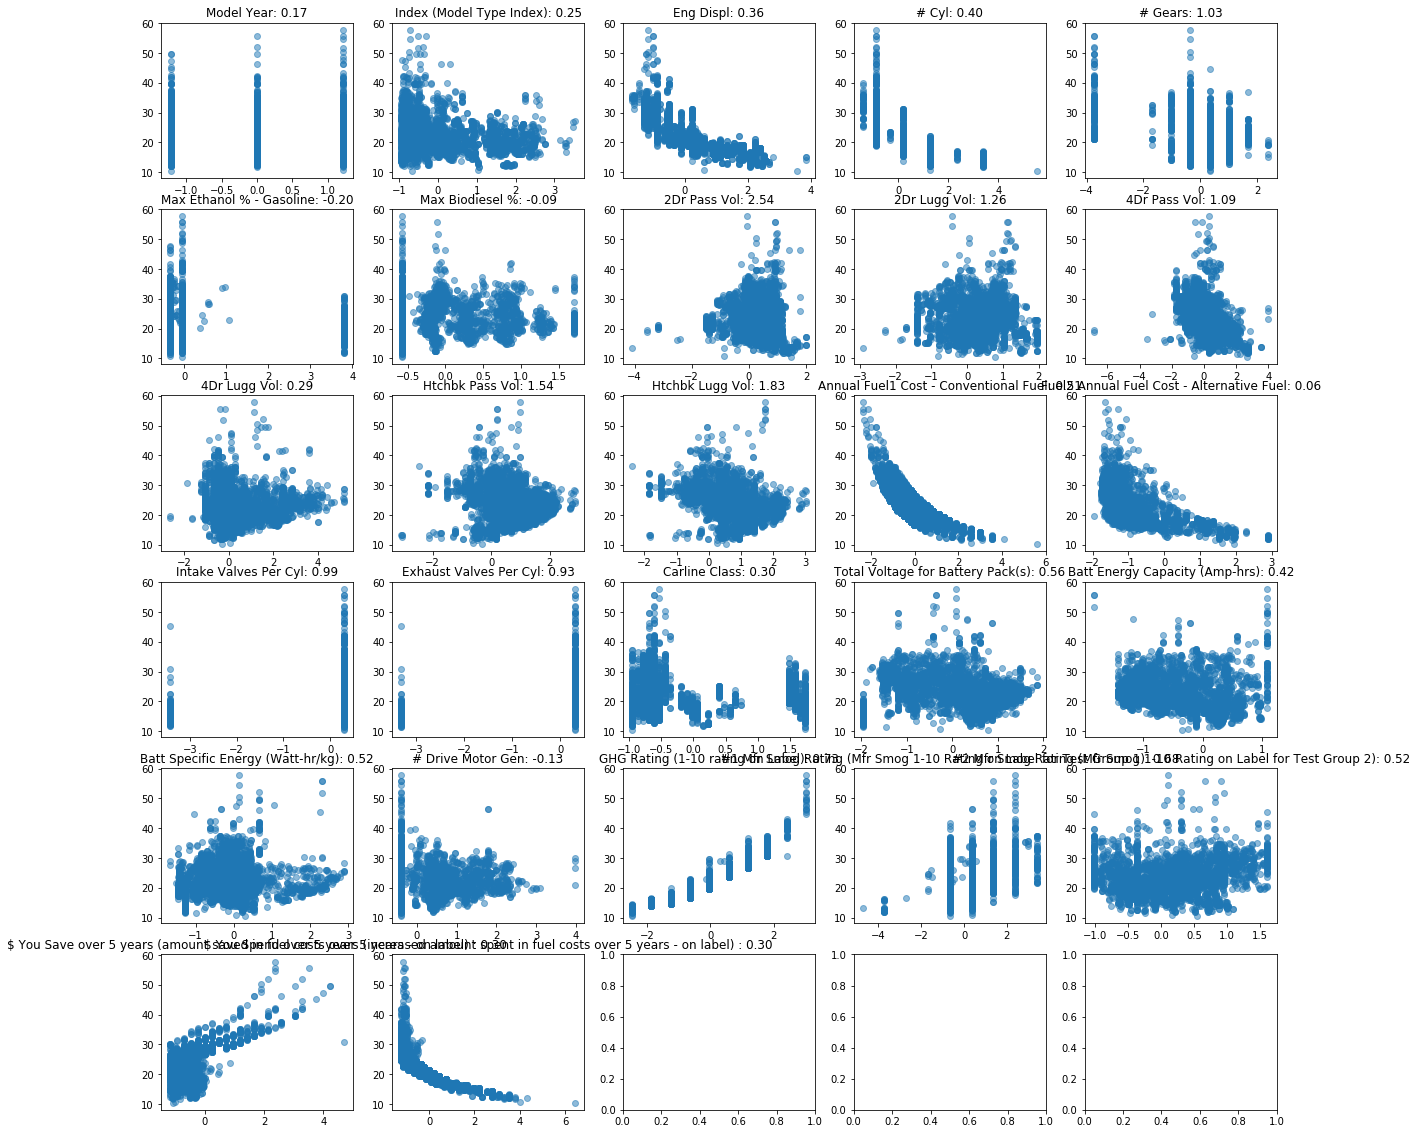

In [76]:
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 26:
        continue
    ax.scatter(train_impute[:, i], target_train_sub, alpha=.5)
    ax.set_title("{}: {:.2f}".format(good_features[i], pt.lambdas_[i]))

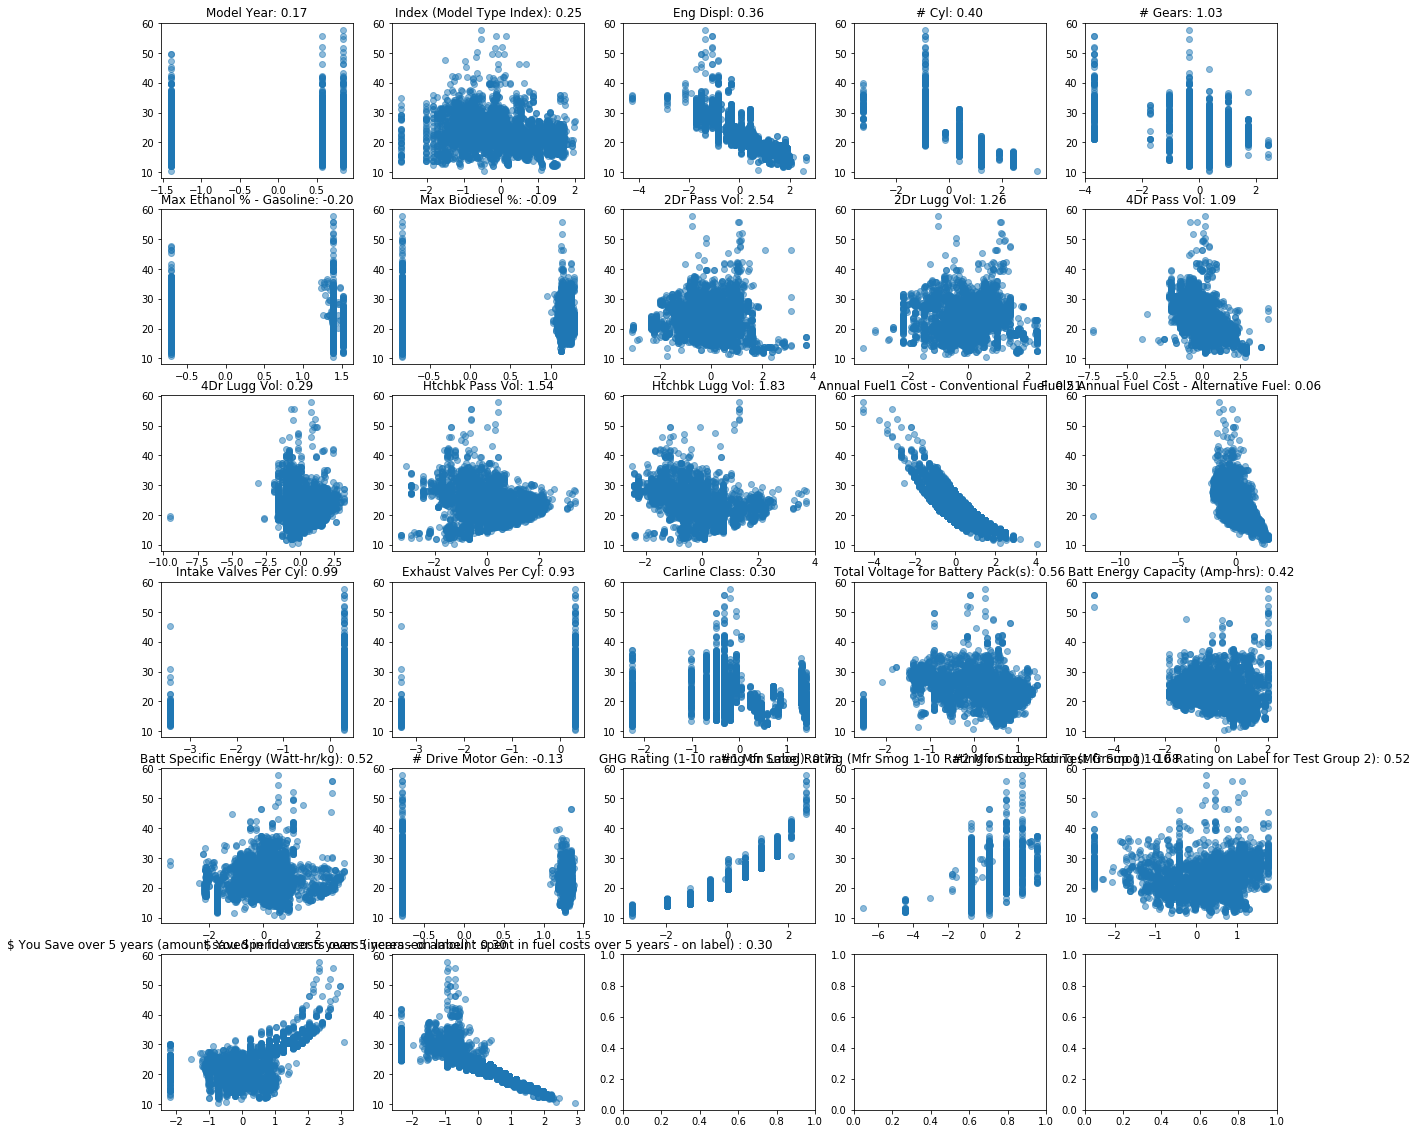

In [77]:
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 26:
        continue
    ax.scatter(X_boxcox[:, i], target_train_sub, alpha=.5)
    ax.set_title("{}: {:.2f}".format(good_features[i], pt.lambdas_[i]))

In [78]:
scores = cross_val_score(LinearRegression(), X_boxcox, target_train_sub, cv=10)
print(scores)
print(scores.mean())

[ 0.948  0.942  0.926  0.96   0.934  0.944  0.928  0.957  0.937  0.88 ]
0.93563134388


In [79]:
scores = cross_val_score(RidgeCV(), X_boxcox, target_train_sub, cv=10)
print(scores)
print(scores.mean())

[ 0.948  0.942  0.926  0.96   0.934  0.944  0.928  0.957  0.937  0.88 ]
0.935683757105


In [80]:
scores = cross_val_score(LinearRegression(), X_boxcox[:, -1:], target_train_sub, cv=10)
print(scores)
print(scores.mean())

[ 0.792  0.577  0.694  0.825  0.563  0.619  0.812  0.626  0.536  0.36 ]
0.640448124962


In [81]:
scores = cross_val_score(LinearRegression(), train_impute[:, -1:], target_train_sub, cv=10)
print(scores)
print(scores.mean())

[ 0.618  0.486  0.478  0.71   0.514  0.535  0.699  0.583  0.477  0.496]
0.559453964222


In [82]:
bla = train_impute.copy()

In [83]:
bla[:, -1] = train_impute[:, -1]

In [84]:
scores = cross_val_score(LinearRegression(), bla, target_train_sub, cv=10)
print(scores)
print(scores.mean())

[ 0.939  0.962  0.948  0.968  0.961  0.956  0.963  0.96   0.924  0.924]
0.950609471975


In [85]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures()
X_poly = pf.fit_transform(train_impute)

In [86]:
scores = cross_val_score(RidgeCV(), X_poly, target_train_sub, cv=10)
print(scores)
print(scores.mean())

[ 0.943  0.98   0.974  0.984  0.974  0.982  0.976  0.977  0.979  0.943]
0.971124581339


In [87]:
from sklearn.linear_model import Ridge
scores = cross_val_score(Ridge(alpha=10), X_poly, target_train_sub, cv=10)
print(scores)
print(scores.mean())

[ 0.957  0.98   0.974  0.984  0.974  0.982  0.976  0.977  0.979  0.943]
0.97258573733


In [88]:
ridge = RidgeCV().fit(X_poly, target_train_sub)

In [89]:
n_important = 30
important_features = np.argsort(np.abs(ridge.coef_))[::-1][:n_important]

In [90]:
good_features_no_spaces = [x.replace(" ", "-") for x in good_features]

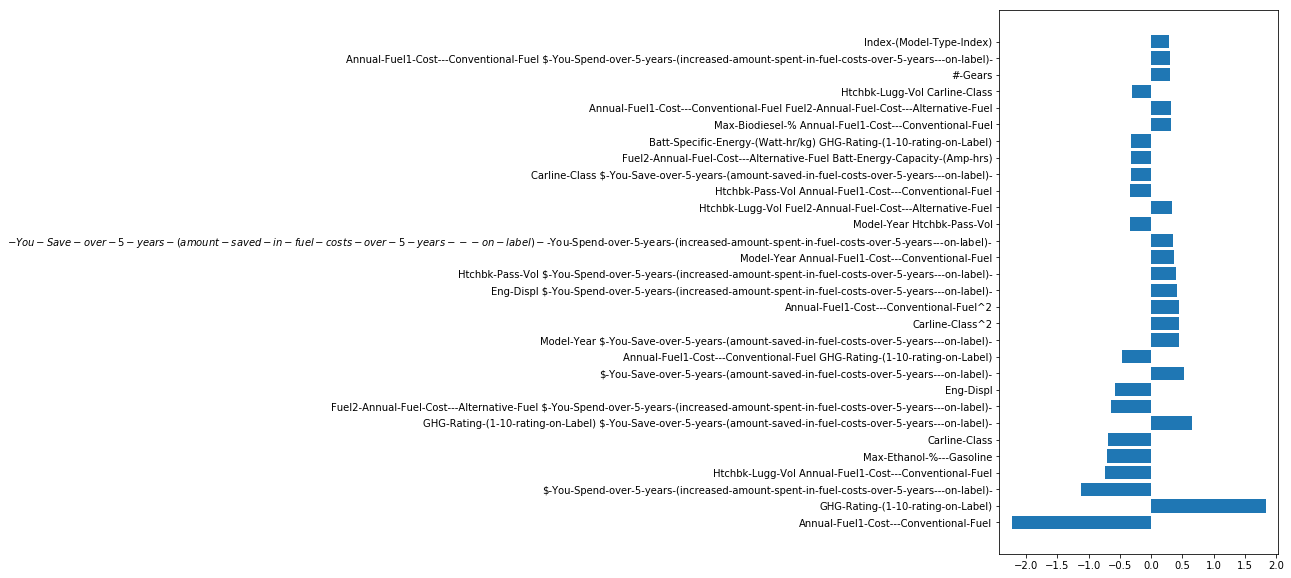

In [91]:
plt.figure(figsize=(5, 10))
plt.barh(np.arange(n_important), ridge.coef_[important_features])
plt.yticks(np.arange(n_important), np.array(pf.get_feature_names(good_features_no_spaces))[important_features]);

In [92]:
X_poly.shape

(3699, 406)

In [93]:
X_no_interactions = np.hstack([train_impute, train_impute ** 2])

In [94]:
scores = cross_val_score(RidgeCV(), X_no_interactions, target_train_sub, cv=10)
print(scores)
print(scores.mean())

[ 0.948  0.979  0.968  0.983  0.973  0.977  0.977  0.971  0.956  0.929]
0.966052025357


In [95]:
pf_full = PolynomialFeatures()
X_poly_full = pf_full.fit_transform(train_full)
scores = cross_val_score(RidgeCV(), X_poly_full, target_train_sub, cv=10, n_jobs=3)
print(scores)
print(scores.mean())

[ 0.966  0.994  0.988  0.992  0.994  0.996  0.987  0.992  0.982  0.98 ]
0.986887197255


In [96]:
X_poly_full.shape

(3699, 39903)

In [97]:
X_cont_interactions = np.hstack([X_poly, train_sub_dummies])

In [98]:
scores = cross_val_score(RidgeCV(), X_cont_interactions, target_train_sub, cv=10)
print(scores)
print(scores.mean())

[ 0.964  0.991  0.99   0.99   0.992  0.994  0.99   0.991  0.987  0.98 ]
0.986824673948


In [99]:
X_cont_interactions.shape

(3699, 642)

# Try simple imputation for easier pipelining

In [100]:
X_train_dummies = np.hstack([scaled, imputation_features, train_sub_dummies])

In [101]:
X_train_dummies.shape

(3699, 281)

In [107]:
import warnings
warnings.filterwarnings("ignore") # Don't do this. Just for the lecture (because of a change in sklearn dev)

In [108]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

pipe = make_pipeline(Imputer(), RidgeCV())

In [109]:
scores = cross_val_score(pipe, X_train_dummies, target_train_sub, cv=10, n_jobs=3)

In [110]:
print(scores)
print(scores.mean())

[ 0.951  0.957  0.955  0.957  0.972  0.975  0.954  0.956  0.942  0.943]
0.956296198513


In [111]:
from sklearn.feature_selection import VarianceThreshold
pipe_poly = make_pipeline(Imputer(), PolynomialFeatures(), VarianceThreshold(), RidgeCV())

In [112]:
scores = cross_val_score(pipe_poly, X_train_dummies, target_train_sub, cv=10, n_jobs=3)
print(scores)
print(scores.mean())

[ 0.965  0.995  0.992  0.993  0.995  0.997  0.987  0.991  0.985  0.984]
0.988297899514


In [120]:
from _column_transformer import ColumnTransformer

In [116]:
len(good_features), scaled.shape[1]

(27, 27)

In [123]:
n_cont_features = len(good_features)
cont_poly = ColumnTransformer(("poly", PolynomialFeatures(), np.arange(n_cont_features)), passthrough=np.arange(n_cont_features, X_train_dummies.shape[1]))

In [125]:
pipe_cont_poly = make_pipeline(Imputer(), cont_poly, RidgeCV())

scores = cross_val_score(pipe_poly, X_train_dummies, target_train_sub, cv=10, n_jobs=3)
print(scores)
print(scores.mean())

[ 0.965  0.995  0.992  0.993  0.995  0.997  0.987  0.991  0.985  0.984]
0.988297899514


# Test set preparation

In [126]:
test_cont = test[good_features]
test_cont.shape

(1208, 27)

In [127]:
test_dummies = pd.get_dummies(test[cat_good])
test_dummies.shape

(1208, 208)

In [130]:
len(test_dummies.columns), len(train_sub_dummies.columns)

(208, 236)

In [147]:
test_cat = test[cat_good].copy()
# probably should have used categorical encoder
for col in cat_good:
    test_cat[col] = pd.Categorical(test_cat[col], categories=train_sub[col].dropna().unique())

In [151]:
test_dummies_fixed = pd.get_dummies(test_cat)

print(len(test_dummies_fixed.columns), len(train_sub_dummies.columns))

test_dummies_fixed = test_dummies_fixed[train_sub_dummies.columns]

print(len(test_dummies_fixed.columns), len(train_sub_dummies.columns))

236 236
238 236


In [154]:
train_sub_dummies.columns.get_duplicates()

['Drive Sys_4']

In [149]:
test_dummies_fixed.columns == train_sub_dummies.columns


ValueError: Lengths must match to compare

# Other Models

In [100]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(rf, train_full, target_train_sub, cv=10, n_jobs=3)
print(scores)
print(scores.mean())

[ 0.985  0.992  0.99   0.991  0.987  0.994  0.994  0.99   0.99   0.99 ]
0.990330858863


In [101]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10)
scores = cross_val_score(rf, train_full, target_train_sub, cv=10, n_jobs=3)
print(scores)
print(scores.mean())

[ 0.985  0.992  0.99   0.991  0.987  0.994  0.994  0.989  0.99   0.989]
0.989872678996


In [104]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10)
scores = cross_val_score(rf, train_full, target_train_sub, cv=cv, n_jobs=3)
print(scores)
print(scores.mean())

[ 0.994  0.995  0.995  0.994  0.996  0.988  0.996  0.993  0.995  0.994]
0.994070972062


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth": [1, 3, 5, 10, 15, 20]}
grid = GridSearchCV(rf, param_grid, cv=10, verbose=3, n_jobs=3)
grid.fit(train_full, target_train_sub)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
res = pd.DataFrame(grid.cv_results_)

In [ ]:
res.mean_test_score.plot()
res.mean_train_score.plot()
plt.legend()

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10)
rf_pred = cross_val_predict(rf, train_full, target_train_sub, cv=cv, n_jobs=3)

In [ ]:
ridge_pred = cross_val_predict(RidgeCV(), X_cont_interactions, target_train_sub, cv=cv, n_jobs=3)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(target_train_sub, rf_pred))
print(r2_score(target_train_sub, ridge_pred))
print(r2_score(target_train_sub, (rf_pred + ridge_pred)/2))

In [ ]:
plt.scatter(target_train_sub, rf_pred, alpha=.1)
plt.xlabel("target")
plt.ylabel("prediction")
plt.plot([0, 60], [0, 60], c='k')

In [ ]:
plt.scatter(target_train_sub, ridge_pred, alpha=.1)
plt.xlabel("target")
plt.ylabel("prediction")
plt.plot([0, 60], [0, 60], c='k')

# Feature selection